<a href="https://colab.research.google.com/github/Sly-ai/MachineLearningModel/blob/main/Customer_Churn_Rate_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/CSV_files/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Get the basic information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Get the numerical summary statistics of the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Get the categorical summary statistics of the dataset
df.describe(exclude = 'number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [ ]:
# Check for missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


If missing data (blank fields) where found there we would use one of the following three methods to address it.

**Listwise Deletion:**Listwise deletion is a method where entire rows (or columns) are deleted if they contain missing values. This can be done using the dropna() function in Python.

**Filling with Mean, Median or Mode:**You can fill missing values with the mean, median or mode of the respective column using the fillna() function.

**Imputation:** Imputation is a method where missing values are replaced with a more suitable value. You can use the impute function from the sklearn.impute module for imputation.





In [ ]:
#Then, we would check the target variable to see if we have an imbalance case.

print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


There is a slight imbalance, as only close to 25% of the churn occurs compared to the non-churn cases.

Let’s also see the distribution of the other features, starting with the numerical features. However, we would also transform the TotalCharges feature into a numerical column, as this feature should be numerical rather than a category. Additionally, the SeniorCitizen feature should be categorical thus transformed into strings. Also, as the Churn feature is categorical, we would develop new features that show it as a numerical column.

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'ChurnTarget'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

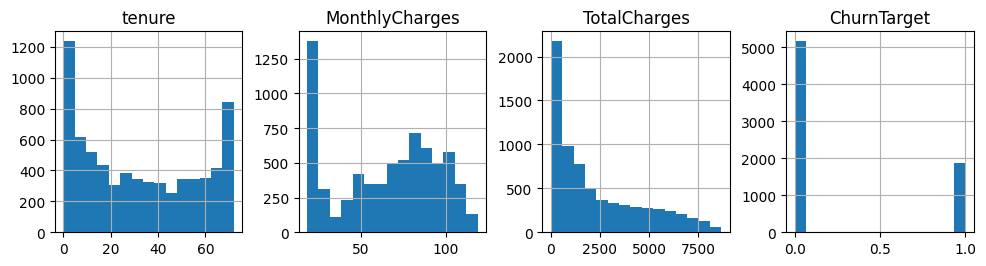

In [ ]:
import numpy as np
#NumPy is a Python library used for working with arrays and mathematical operations.
#It provides support for large, multi-dimensional arrays and matrices.

df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

df['SeniorCitizen'] = df['SeniorCitizen'].astype('str')

df['ChurnTarget'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

num_features = df.select_dtypes('number').columns
df[num_features].hist(bins=15, figsize=(15, 6), layout=(2, 5))

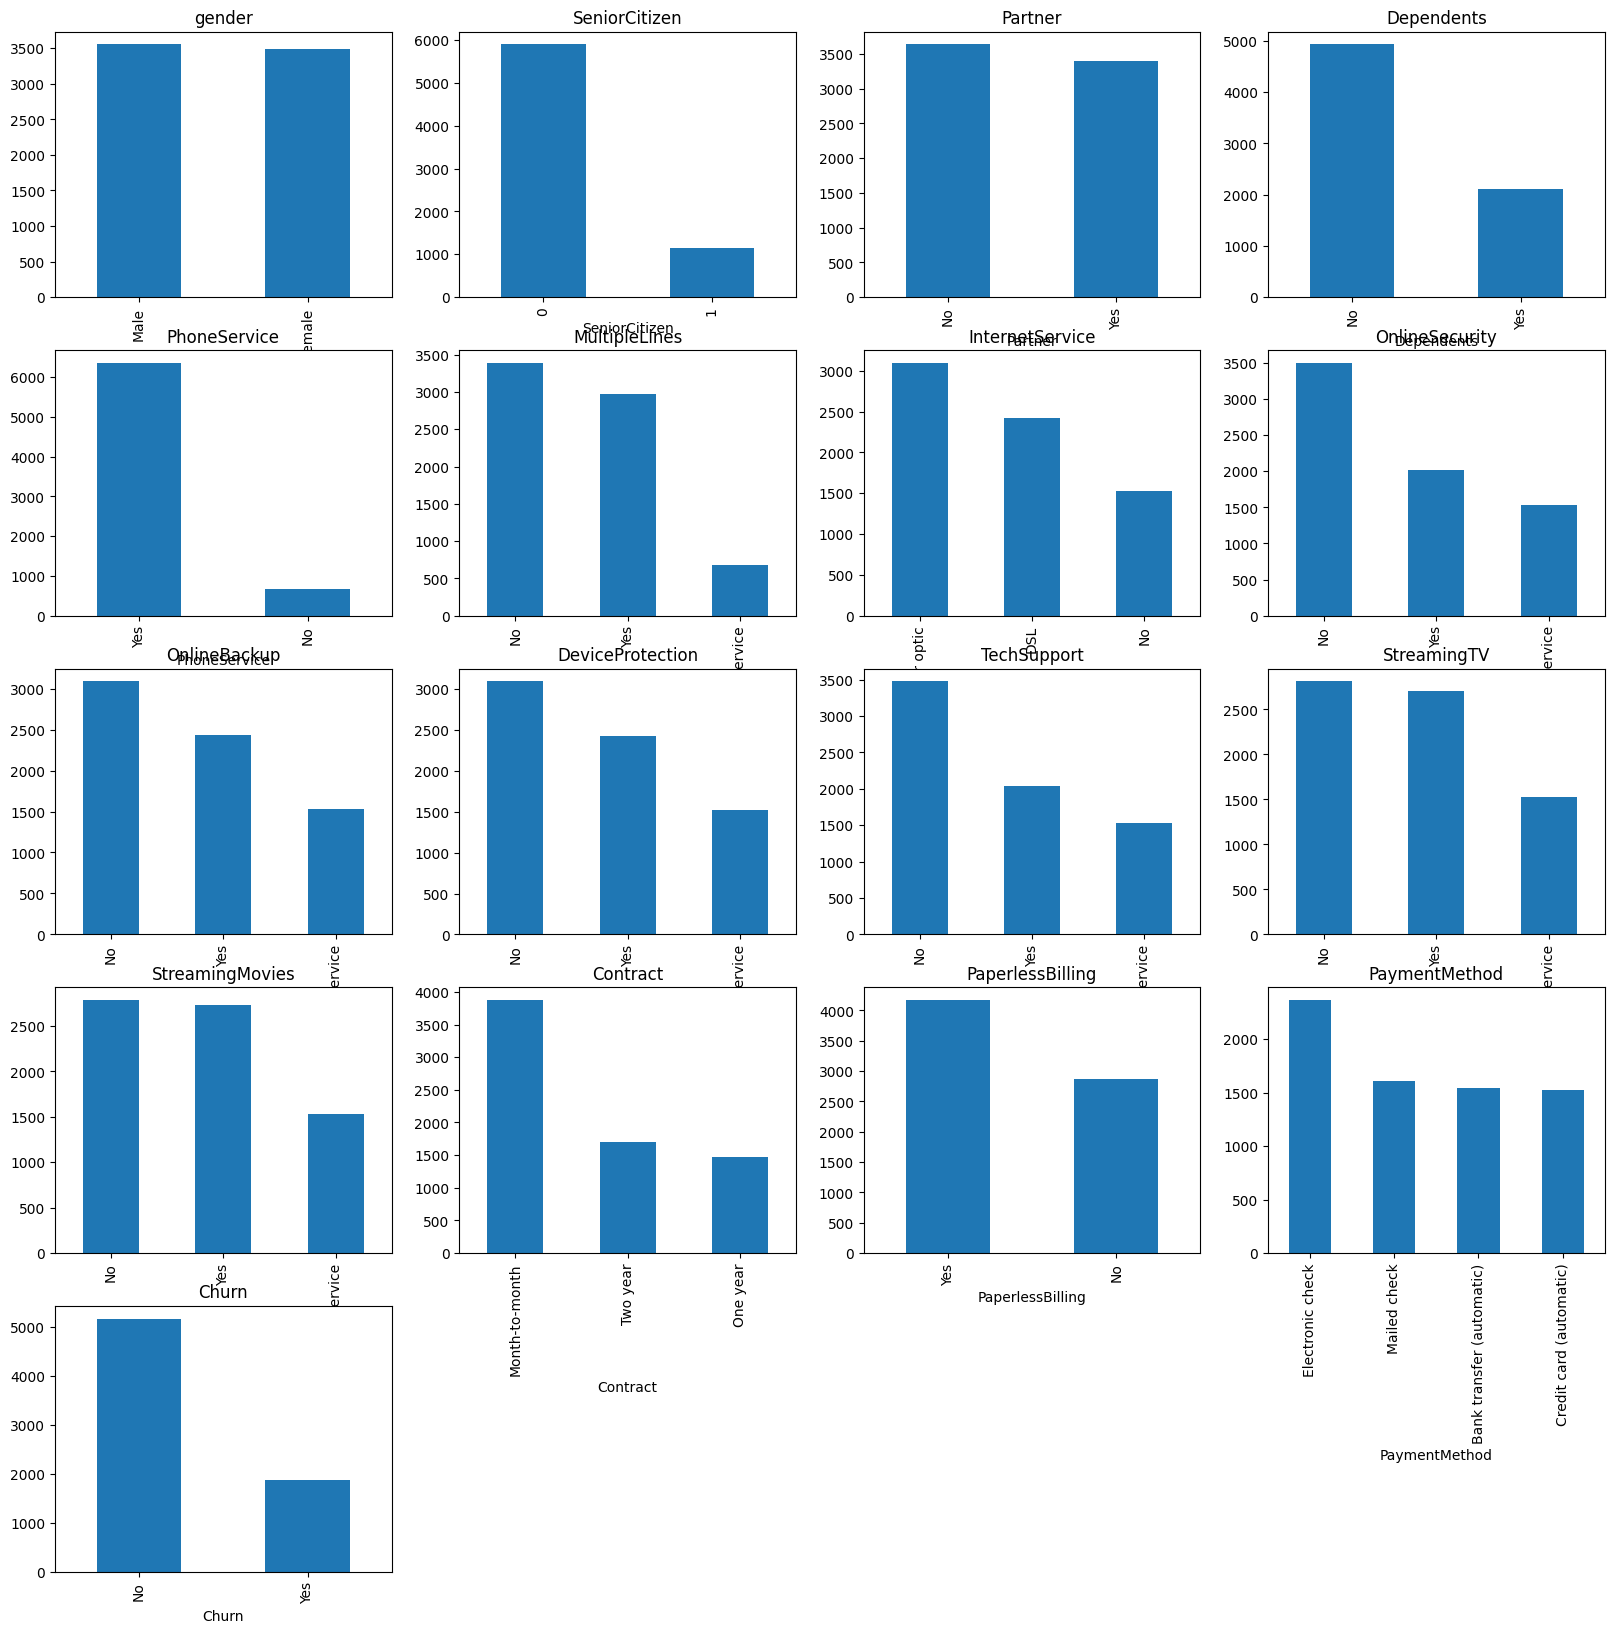

In [ ]:
import matplotlib.pyplot as plt
# Plot distribution of categorical features
cat_features = df.drop('customerID', axis =1).select_dtypes(include='object').columns

plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_features, 1):
    plt.subplot(5, 4, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)

Text(0.5, 1.0, 'Correlation Heatmap')

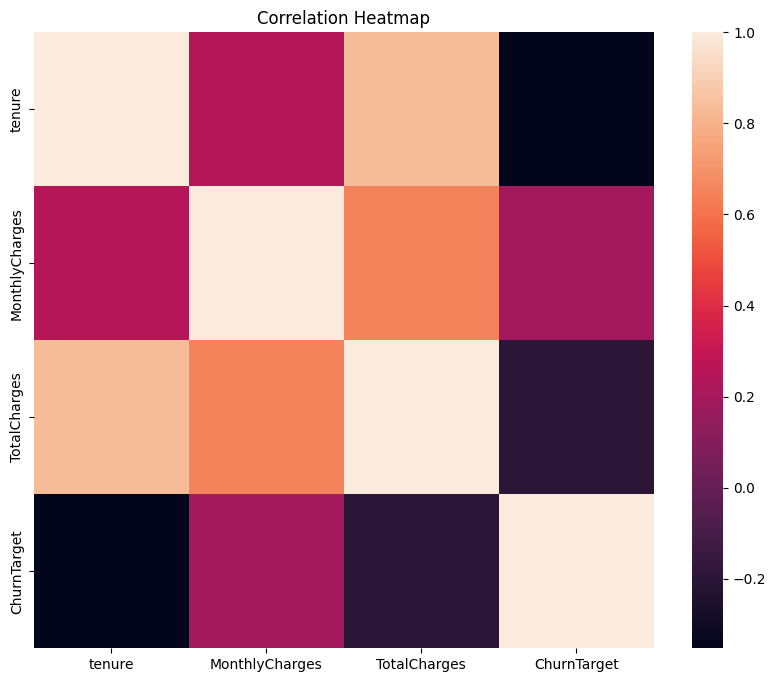

In [ ]:
import seaborn as sns

# Plot correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_features].corr())
plt.title('Correlation Heatmap')

To perform correlation analysis for categorical data we would utilise Cramer’s V. To make the analysis easier, we would install Dython Python package that could help our analysis.

Text(0.5, 1.0, 'Correlation Matrix')

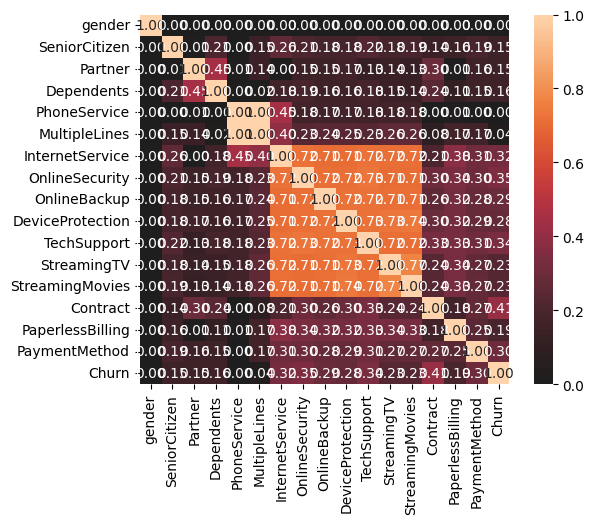

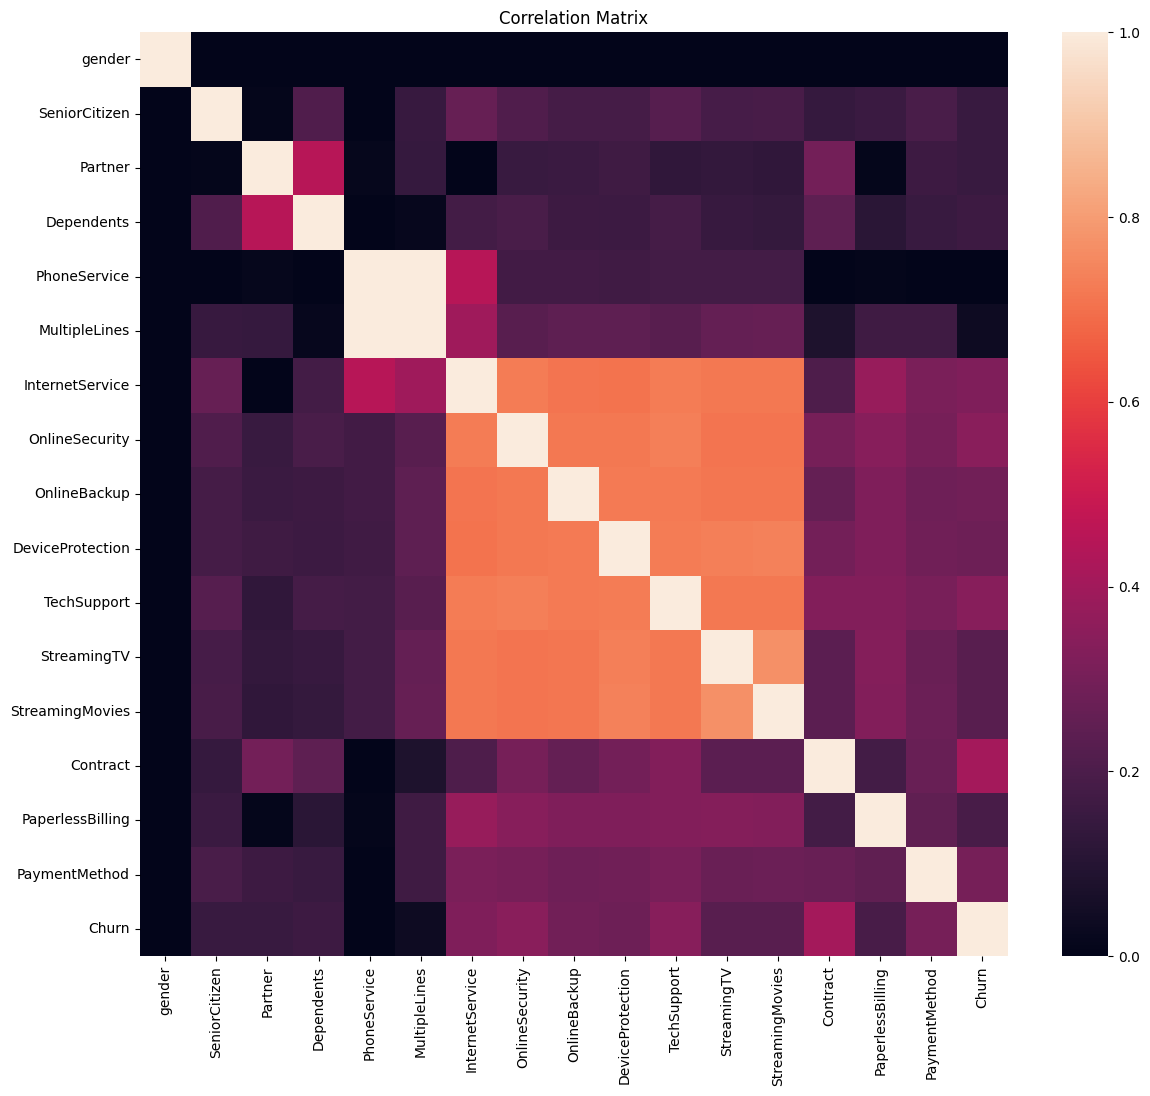

In [ ]:
!pip install dython
from dython.nominal import associations

# Calculate the Cramer’s V and correlation matrix
assoc = associations(df[cat_features], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix')

Lastly, we would check the numerical outlier with a box plot based on the Interquartile Range (IQR).

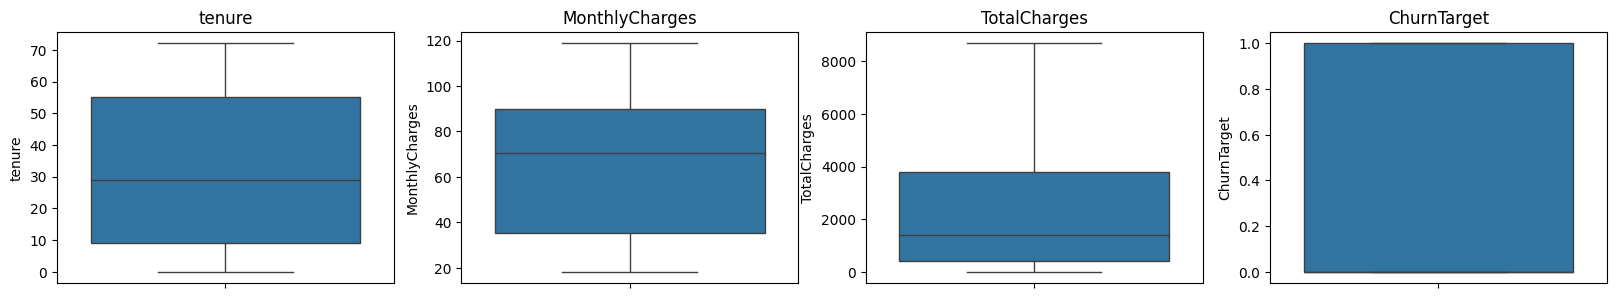

In [ ]:
# Plot box plots to identify outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)


From the analysis above, we can see that we discovered no missing data or outliers. The next step is to perform feature selection for our machine learning model, as we only want the features that impact the prediction and are viable in the business.

For this model we will use the findings from the correlation analysis as a means to select the features for this customer churn rate predicting model

In [ ]:
#First let’s select the numerical features based on the correlation analysis.

target = 'ChurnTarget'
num_features = df.select_dtypes(include=[np.number]).columns.drop(target)

# Calculate correlations
correlations = df[num_features].corrwith(df[target])

# Set a threshold for feature selection
threshold = 0.3
selected_num_features = correlations[abs(correlations) > threshold].index.tolist()

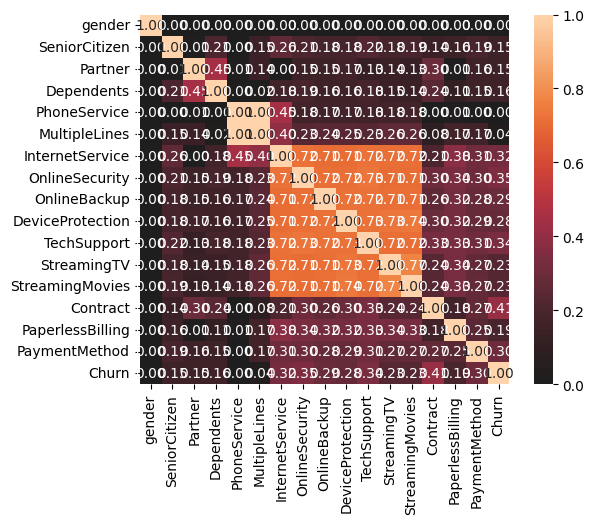

In [ ]:
#We would also perform the feature selection into the categorical features.

categorical_target = 'Churn'

assoc = associations(df[cat_features], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

threshold = 0.3
selected_cat_features = corr_matrix[corr_matrix.loc[categorical_target] > threshold ].index.tolist()

del selected_cat_features[-1]

In [ ]:
#Then, we would combine all the selected features with the following code.

selected_features = []
selected_features.extend(selected_num_features)
selected_features.extend(selected_cat_features)

print(selected_features)

['tenure',
 'InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaymentMethod']

['tenure', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod']


['tenure',
 'InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaymentMethod']

In the end, we have identified six features that would be used to develop the customer churn machine learning model.

Now for the model selection, we will use the linear model Logistic Regression for the model development.

**Splitting the Data**

The next activity is to split the data into training, test, and validation sets. The purpose of data splitting during machine learning model training is to have a data set that acts as unseen data (real-world data) to evaluate the model unbias without any data leakage.

In [ ]:
from sklearn.model_selection import train_test_split

target = 'ChurnTarget'

X = df[selected_features]
y = df[target]

cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=['number']).columns.tolist()

#Splitting data into Train, Validation, and Test Set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

The first train_test_split splits the data into two parts:

X_train_val and y_train_val (80% of the data) will be used for training and validation.

X_test and y_test (20% of the data) will be used as the test set.


The second train_test_split splits the X_train_val and y_train_val further into:

X_train and y_train (60% of the original data) for training.

X_val and y_val (20% of the original data) for validation.

Training the Model
As mentioned, we would train a Logistic Regression model with our training data. However, the model can only accept numerical data, so we must preprocess the dataset. This means we need to transform the categorical data into numerical data.

In [ ]:
#By using the Scikit-Learn pipeline we can contain all the preprocessing and modeling steps.

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
# Prepare the preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the logistic regression model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['tenure']),
                                                 ('cat', OneHotEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

The Scikit-Learn pipeline would accept the unseen data and go through all the preprocessing steps before entering the model. After the model is finished training, let’s evaluate our model result.

Next ***Model Evaluation***
As mentioned, we will evaluate the model by focusing on the Recall metrics.

In [ ]:
from sklearn.metrics import classification_report

# Evaluate on the validation set
y_val_pred = pipeline.predict(X_val)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



As we can see from the Validation and Test data, the Recall for churn (1) is not the best. That’s why we can optimize the model to get the best result.

Which us to the next time ***Model Optimization***, despite the rule of thumb to focus on the data to get the best result we can refine the model to get the desired results. One way to optimize the model is via hyperparameter optimization, which tests all combinations of these model hyperparameters to find the best one based on the metrics.

In [ ]:
#We call hyperparameter optimization the experiment to see which combination is the best

from sklearn.model_selection import GridSearchCV
# Define the logistic regression model within a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define the hyperparameters for GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__solver': ['lbfgs', 'liblinear']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on the validation set
y_val_pred = grid_search.predict(X_val)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = grid_search.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Best Hyperparameters: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



Unfortunately despite optimisation efforts the recall score doesn't show the best score. But this is expected as they are only the baseline model.

By experimenting with several models there might be a chance to see better Recall performance by tweaking the hyperparameter.

[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:Bo

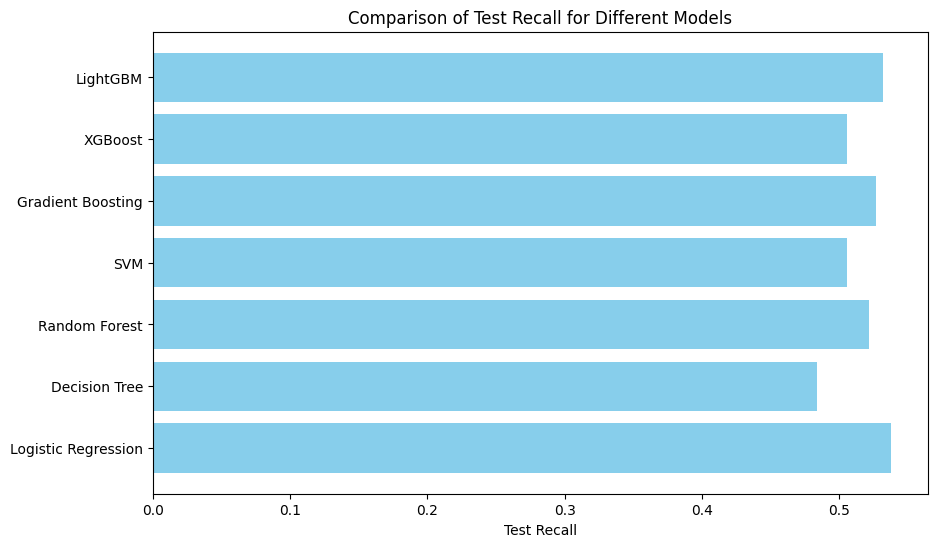

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score

# Define the models and their parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 10, 20]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 6, 9]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__num_leaves': [31, 50, 100]
        }
    }
}

results = []

# Train and evaluate each model
for model_name, model_info in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model_info['model'])
    ])

    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='recall')
    grid_search.fit(X_train, y_train)

    # Best model from Grid Search
    best_model = grid_search.best_estimator_

    # Evaluate on the validation set
    y_val_pred = best_model.predict(X_val)
    val_recall = recall_score(y_val, y_val_pred, pos_label=1)

    # Evaluate on the test set
    y_test_pred = best_model.predict(X_test)
    test_recall = recall_score(y_test, y_test_pred, pos_label=1)

    # Save results
    results.append({
        'model': model_name,
        'best_params': grid_search.best_params_,
        'val_recall': val_recall,
        'test_recall': test_recall,
        'classification_report_val': classification_report(y_val, y_val_pred),
        'classification_report_test': classification_report(y_test, y_test_pred)
    })

# Plot the test recall scores
plt.figure(figsize=(10, 6))
model_names = [result['model'] for result in results]
test_recalls = [result['test_recall'] for result in results]
plt.barh(model_names, test_recalls, color='skyblue')
plt.xlabel('Test Recall')
plt.title('Comparison of Test Recall for Different Models')
plt.show()
